In [1]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [2]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_woods

maze = gym.make('Woods1-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()


This is how maze looks like
<class 'list'>
['.', 'O', 'O', '.', '.', '.', '.', '.']

□ □ □ □ □
□ □ □ □ □
■ ■ $ □ □
■ ■ ■ □ □
■ ■ ■ □ X


In [3]:
from lcs.agents.xncs import Configuration
from utils.nxcs_utils import *

cfg = Configuration(number_of_actions=8,
                    max_population=1800,
                    learning_rate=0.2, # beta
                    epsilon_0=0.01,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08, # mu
                    delta=0.1,
                    ga_threshold=25,
                    deletion_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction = 10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=20
                    )

In [4]:
from utils.nxcs_utils import avg_experiment as XNCSExp

number_of_experiments = 1
explore = 0
exploit = 2500

df = XNCSExp(
    maze=maze,
    cfg=cfg,
    number_of_tests=number_of_experiments,
    explore_trials=explore,
    exploit_trials=exploit,
    pre_generate=True
    )

Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 8, 'reward': 1000.0, 'perf_time': 0.08481480000000019, 'numerosity': 1800, 'population': 1637, 'average_specificity': 8.145, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 2, 'reward': 1886.4707571494996, 'perf_time': 0.02985010000000088, 'numerosity': 1800, 'population': 1585, 'average_specificity': 8.71111111111111, 'fraction_accuracy': 0.11328125}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 8, 'reward': 1082.2976794931064, 'perf_time': 0.11306730000000442, 'numerosity': 1800, 'population': 1573, 'average_specificity': 10.06611111111111, 'fraction_accuracy': 0.375}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 7, 'reward': 1093.588574743161, 'perf_time': 0.09264579999999967, 'numerosity': 1800, 'population': 1580, 'average_specificity': 11.934444444444445, 'fraction_accuracy': 0.125}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 38, 'reward': 1000.0023853594896, 'perf_

In [5]:
display(df)

,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy
trial,,,,,,,
0,8,1.000000e+03,0.084815,1800,1637,8.145000,0.000000
100,5,1.250735e+03,0.062643,1800,1597,8.130556,0.000000
200,2,1.886471e+03,0.029850,1800,1585,8.711111,0.113281
300,8,1.069032e+03,0.089705,1800,1593,10.185556,0.241667
400,3,1.707064e+03,0.029097,1800,1584,10.250556,0.241667
500,8,1.082298e+03,0.113067,1800,1573,10.066111,0.375000
600,9,1.049088e+03,0.119529,1800,1582,11.092222,0.000000
700,7,1.093589e+03,0.092646,1800,1580,11.934444,0.125000
800,10,1.071260e+03,0.139656,1800,1575,12.199444,0.375000


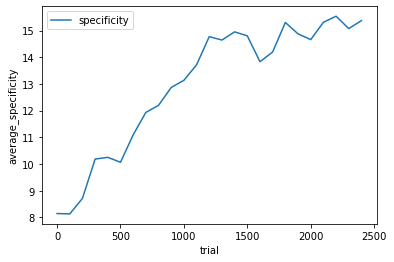

In [6]:
import pandas as pd
import numpy as np

ax = df['average_specificity'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["specificity"])


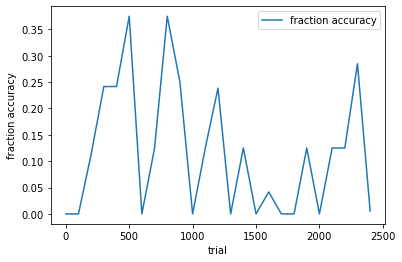

In [7]:
ax = df['fraction_accuracy'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["fraction accuracy"])

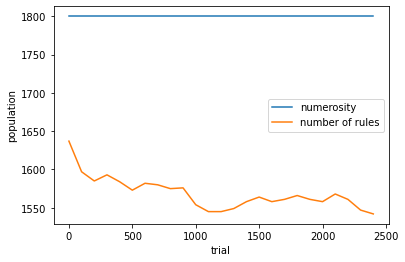

In [8]:
ax = df[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

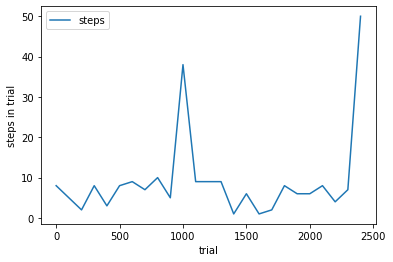

In [9]:
ax = df['steps_in_trial'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["steps"])

In [10]:
print(sum(df['steps_in_trial'])/number_of_experiments)

229.0
